In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [2]:
df = sns.load_dataset('iris')

## Delete a class to have a binary classification problem
df = df[df['species'] != 'setosa'] 

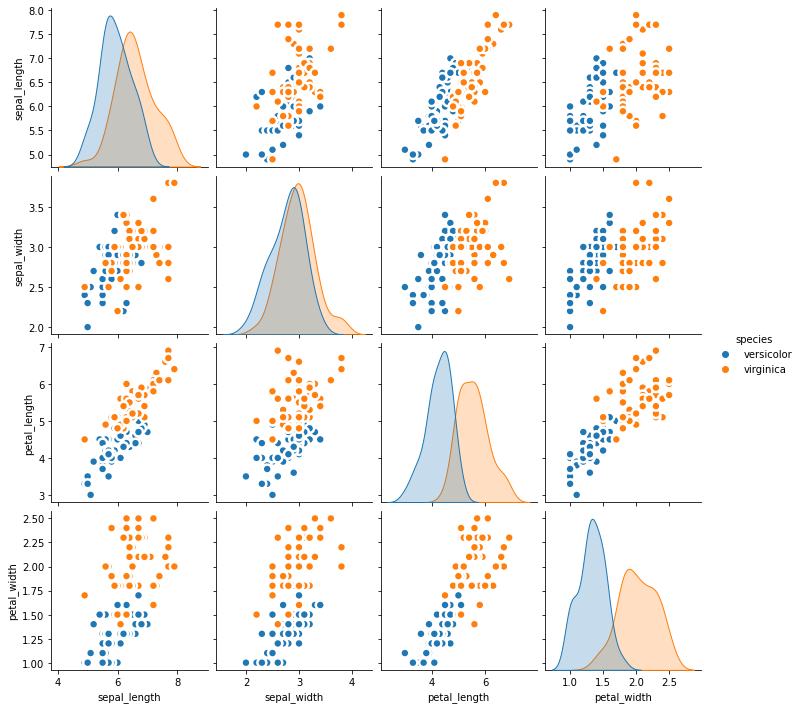

In [3]:
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [4]:
X = df.iloc[:,0:4].values
X = StandardScaler().fit_transform(X)

y = (df.iloc[:,4].values == 'versicolor').astype(int)

print(X[:5,:])
print(y[:5])

[[ 1.11900931  0.99068792 -0.25077906 -0.65303909]
 [ 0.20924564  0.99068792 -0.49425387 -0.41643072]
 [ 0.96738203  0.68864892 -0.00730424 -0.41643072]
 [-1.15539985 -1.72766308 -1.10294091 -0.88964745]
 [ 0.36087292 -0.21746808 -0.37251647 -0.41643072]]
[1 1 1 1 1]


In [5]:
model = Sequential([
    Dense(1,input_shape=(4,), activation='sigmoid') # Default activation: 'linear' 
])
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X, y, epochs=1500, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Test loss: 0.11126507073640823
Test accuracy: 0.9700000286102295


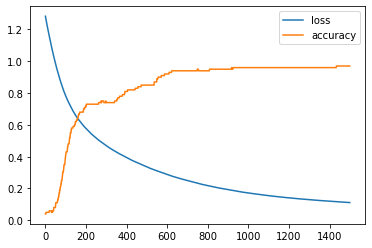

In [6]:
pd.DataFrame(hist.history).plot()
test_loss, test_accuracy=model.evaluate(X,y, verbose=0)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')